# **Задача 4. Обработка стали**

---

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## Описание данных

---

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

### **Импортирование библиотек**

---

In [566]:
import numpy as np
import pandas as pd
import missingno as msgn
import plotly.graph_objects as go

In [567]:
from sklearn.impute import KNNImputer

In [568]:
import warnings
warnings.filterwarnings('ignore')

#### **Чтение файлов и сохранение полученных данных в переменные**

---

In [569]:
df_data_arc = pd.read_csv("final_steel\\data_arc.csv")
df_data_bulk = pd.read_csv('final_steel\\data_bulk.csv')
df_data_bulk_time = pd.read_csv('final_steel\\data_bulk_time.csv')
df_data_gas = pd.read_csv('final_steel\\data_gas.csv')
df_data_temp = pd.read_csv('final_steel\\data_temp.csv')
df_data_wire = pd.read_csv('final_steel\\data_wire.csv')
df_data_wire_time = pd.read_csv('final_steel\\data_wire_time.csv')

### <font>**Анализ данных**</font>

#### **Анализ данных датасета 'data_arc.csv'**

---

In [570]:
df_data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [571]:
df_data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [572]:
df_data_arc.duplicated().sum()

0

Явных дубликатов в датасете нет.

<Axes: >

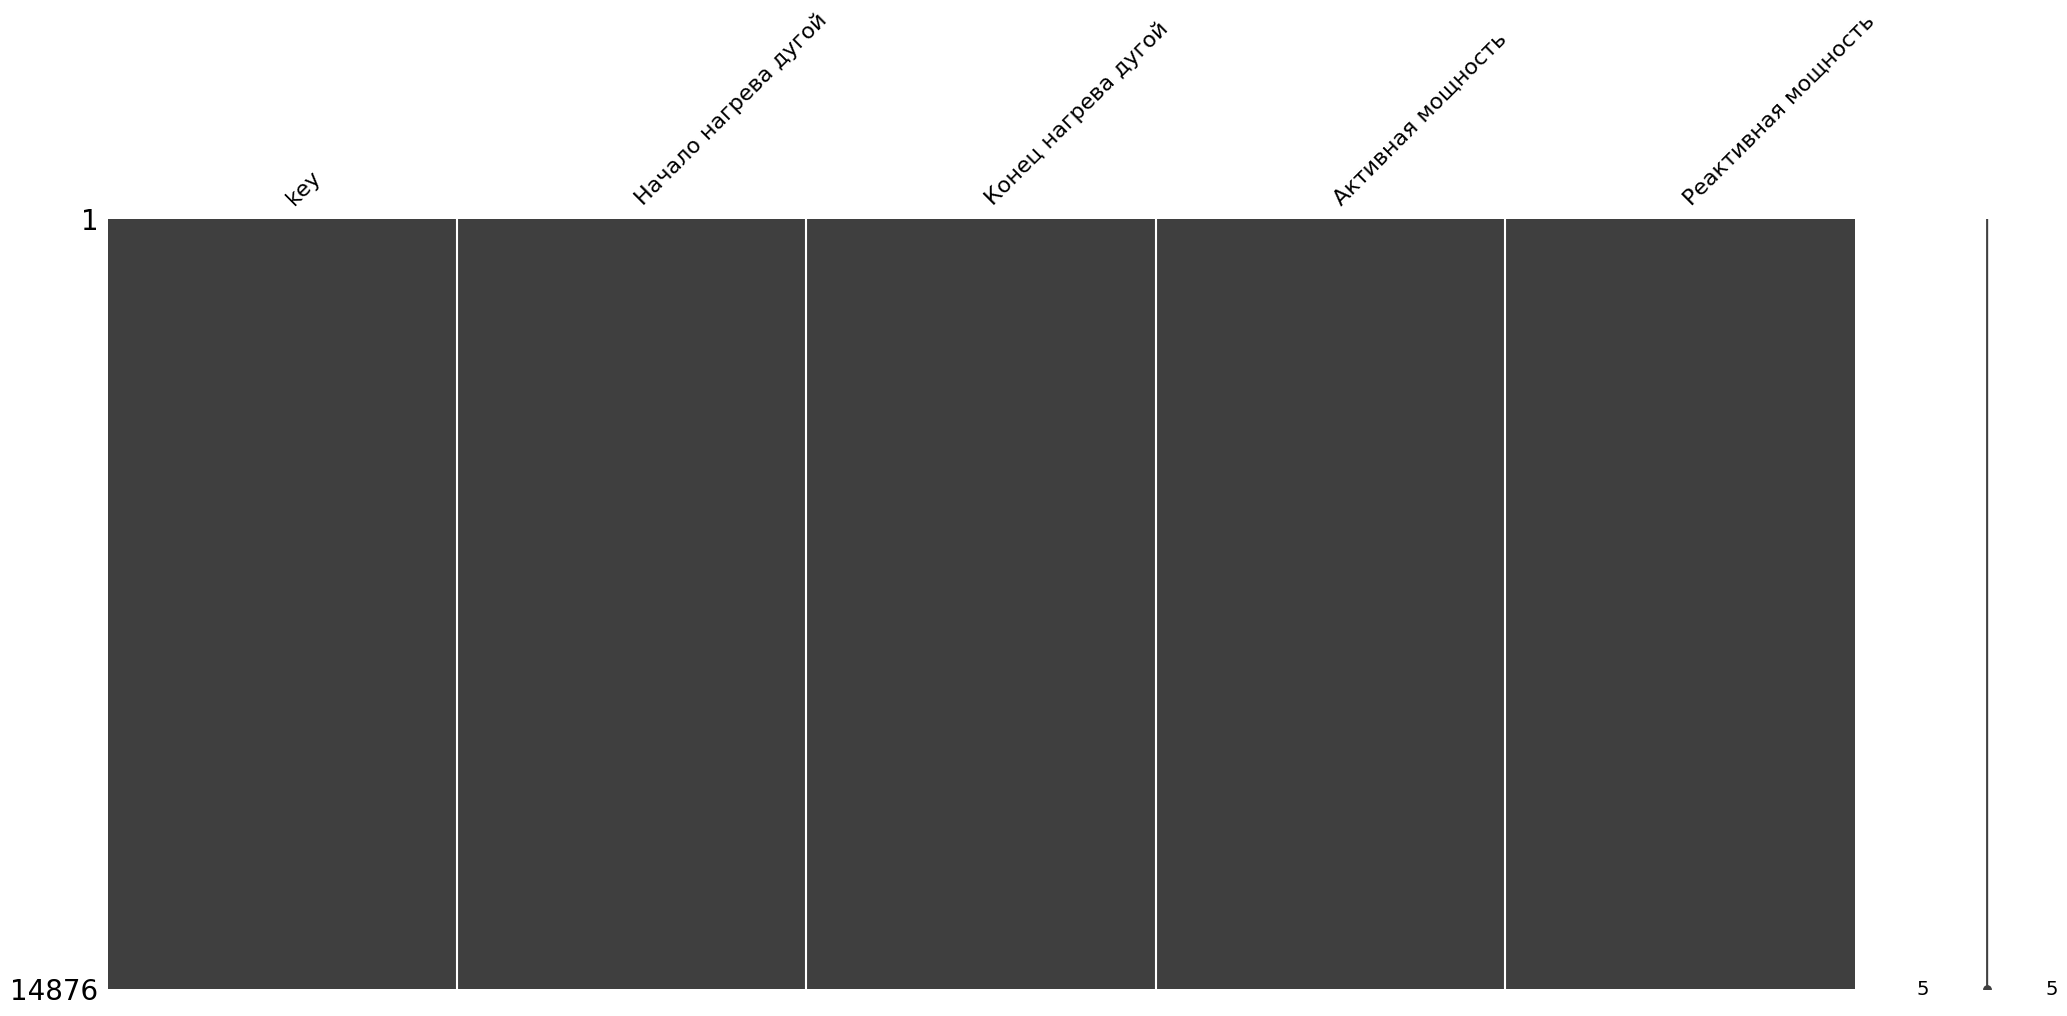

In [573]:
msgn.matrix(df_data_arc)

In [574]:
df_data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Пропусков в датасете нет.

In [575]:
df_data_arc.nunique()

key                      3214
Начало нагрева дугой    14875
Конец нагрева дугой     14876
Активная мощность       14869
Реактивная мощность     14866
dtype: int64

В анализируемом наборе данных обнаружено, что количество уникальных значений в признаках "Начало нагрева дугой", "Активная мощность" и "Реактивная мощность" практически равно общему числу наблюдений в датасете, составляющем 14876. Это указывает на то, что эти признаки обладают высокой вариативностью и могут содержать информацию, полезную для анализа.

В отличие от этого, количество уникальных значений в признаке "key" (номера партий) оказалось значительно меньше, примерно в пять раз. Это объясняется тем, что каждая партия была обработана несколько раз, что привело к нескольким итерациям в данных.

In [576]:
df_data_arc.dtypes

key                       int64
Начало нагрева дугой     object
Конец нагрева дугой      object
Активная мощность       float64
Реактивная мощность     float64
dtype: object

In [577]:
df_data_arc['Начало нагрева дугой'] = pd.to_datetime(df_data_arc['Начало нагрева дугой'])
df_data_arc['Конец нагрева дугой'] = pd.to_datetime(df_data_arc['Конец нагрева дугой'])

In [578]:
df_data_arc.dtypes

key                              int64
Начало нагрева дугой    datetime64[ns]
Конец нагрева дугой     datetime64[ns]
Активная мощность              float64
Реактивная мощность            float64
dtype: object

In [579]:
# проверим самую раннюю дату проведения измерений
print('Дата самого раннего начала нагрева: \n',
      df_data_arc['Начало нагрева дугой'].min())
print('Дата самого раннего окончания нагрева: \n',
      df_data_arc['Конец нагрева дугой'].min())

Дата самого раннего начала нагрева: 
 2019-05-03 11:02:14
Дата самого раннего окончания нагрева: 
 2019-05-03 11:06:02


In [580]:
# проверим самую позднюю дату проведения измерений
print('Дата самого позднего начала нагрева: \n',
      df_data_arc['Начало нагрева дугой'].max())
print('Дата самого позднего окончания нагрева: \n',
      df_data_arc['Конец нагрева дугой'].max())

Дата самого позднего начала нагрева: 
 2019-09-01 04:34:47
Дата самого позднего окончания нагрева: 
 2019-09-01 04:36:08


In [581]:
# проверим, сколько времени прошло между самым ранним и поздним
# окончанием нагрева
print('Промежуток между самым ранним и поздним началом нагрева: \n',
      df_data_arc['Конец нагрева дугой'].max() - \
      df_data_arc['Конец нагрева дугой'].min())

Промежуток между самым ранним и поздним началом нагрева: 
 120 days 17:30:06


In [582]:
df_data_arc.describe().T

,count,mean,min,25%,50%,75%,max,std
key,14876.0,1615.220422,1.0,806.0,1617.0,2429.0,3241.0,934.571502
Начало нагрева дугой,14876,2019-07-02 16:15:28.218203904,2019-05-03 11:02:14,2019-06-02 07:01:09.249999872,2019-06-30 09:57:14.500000,2019-08-03 13:04:47.750000128,2019-09-01 04:34:47,NaN
Конец нагрева дугой,14876,2019-07-02 16:18:19.889150208,2019-05-03 11:06:02,2019-06-02 07:04:21,2019-06-30 10:01:01,2019-08-03 13:09:14,2019-09-01 04:36:08,NaN
Активная мощность,14876.0,0.670441,0.030002,0.395297,0.555517,0.857034,3.731596,0.408159
Реактивная мощность,14876.0,0.452592,-715.504924,0.290991,0.415962,0.637371,2.676388,5.878702


Предполагается, что в признаке "Реактивная мощность" могут присутствовать выбросы в направлении минимальных значений. Для проверки этой гипотезы предлагается создать функцию, которая будет выводить два графика одновременно: первый график будет показывать наличие выбросов, а второй - распределение самого признака.

In [583]:
def outliers_and_features_distribution(data, name, description, color):
    # Ящик с усами
    fig = go.Figure()
    fig.add_trace(go.Box(x=data[name], name=name, marker_color=color))
    fig.update_layout(
        title=f'Выбросы в признаке \'{name}\'',
        xaxis=dict(title=f'{description}', titlefont_size=18),
        yaxis=dict(title='Значения', titlefont_size=18),
        # plot_bgcolor='white',
        xaxis_showgrid=True,
        yaxis_showgrid=True,
    )
    fig.show()
    
    # Гистограмма
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data[name], marker_color=color, nbinsx=50))
    fig.update_layout(
        title=f'Распределение значений в признаке \'{name}\'',
        xaxis=dict(title=f'{description}', titlefont_size=18),
        yaxis=dict(title='Частота встречаемости', titlefont_size=18),
        # plot_bgcolor='white',
        xaxis_showgrid=True,
        yaxis_showgrid=True,
    )
    fig.show()

In [584]:
outliers_and_features_distribution(
    df_data_arc,
    'Реактивная мощность',
    'Реактивная мощность',
    'turquoise')

In [585]:
df_data_arc.loc[df_data_arc['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


Предложенный выброс требует дальнейшей обработки или удаления. Поскольку он является единичным, предлагается обработать его. Для этого мы заменим его на пропущенное значение (np.nan) и заполним пропуск методом ближайших соседей.

In [586]:
df_data_arc.loc[df_data_arc['Реактивная мощность'] < 0, 'Реактивная мощность'] = np.nan

In [587]:
df_data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     1
dtype: int64

In [588]:
imputer_data_arc = KNNImputer(
    n_neighbors = 5,
    copy = False
)

In [589]:
na_columns = ['Активная мощность', 'Реактивная мощность']
na_columns

['Активная мощность', 'Реактивная мощность']

In [590]:
df_data_arc[na_columns] = imputer_data_arc.fit_transform(df_data_arc[na_columns])

In [591]:
df_data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Пропущенное значение было успешно заменено методом ближайших соседей, что позволило эффективно удалить выброс. Для проверки эффективности этой операции, рекомендуется повторно отобразить диаграмму размаха и график распределения признака.

In [592]:
outliers_and_features_distribution(
    df_data_arc,
    'Реактивная мощность',
    'Реактивная мощность',
    'turquoise')

Значения, превышающие 1.16 определены, как выбросы. Посчитаем их количество.

In [593]:
react_power_outliers = round((df_data_arc.loc[df_data_arc['Реактивная мощность'] > 1.16].shape[0] / df_data_arc.shape[0]) * 100, 2)
print(f'Доля выбросов в признаке \'Реактивная мощность\': \n {react_power_outliers}%')

Доля выбросов в признаке 'Реактивная мощность': 
 3.98%


In [594]:
outliers_and_features_distribution(
    df_data_arc,
    'Активная мощность',
    'Активная мощность',
    'lightcoral')

In [595]:
react_power_outliers = round((df_data_arc.loc[df_data_arc['Активная мощность'] > 1.54].shape[0] / df_data_arc.shape[0]) * 100, 2)
print(f'Доля выбросов в признаке \'Активная мощность\': \n {react_power_outliers}%')

Доля выбросов в признаке 'Активная мощность': 
 3.93%


Количество обнаруженных выбросов в признаках "Активная мощность" и "Реактивная мощность" в общей сложности невелико, а диапазон значений не является чрезмерно широким. Все значения будут сохранены, за исключением одного случая: в признаке "Активная мощность" максимальное значение будет заменено на пропущенное значение (np.nan), которое затем будет заполнено методом ближайших соседей.

In [596]:
df_data_arc.loc[df_data_arc['Активная мощность'] > 3.5, 'Активная мощность'] = np.nan

In [597]:
df_data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       1
Реактивная мощность     0
dtype: int64

In [598]:
df_data_arc[na_columns] = imputer_data_arc.fit_transform(df_data_arc[na_columns])

In [599]:
df_data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Пропуск в признаке 'Активная мощность' успешно заполнен.

#### **Анализ данных датасета 'data_bulk.csv '**

---

In [600]:
df_data_bulk.shape

(3129, 16)

In [601]:
df_data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [602]:
df_data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Корректеровки типов данных в данном датасете не требуется.

In [603]:
df_data_bulk.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.00,1622.0,2431.00,3241.0
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0


Стандартное отклонение для признаков 'Bulk 7' и 'Bulk 12' значительно превышает 100, что существенно выше, чем у других признаков в наборе данных. После дополнительной проверки и уточнения количества пропущенных значений, будет проведена оценка распределения значений в этих признаках.

In [604]:
df_data_bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

<Axes: >

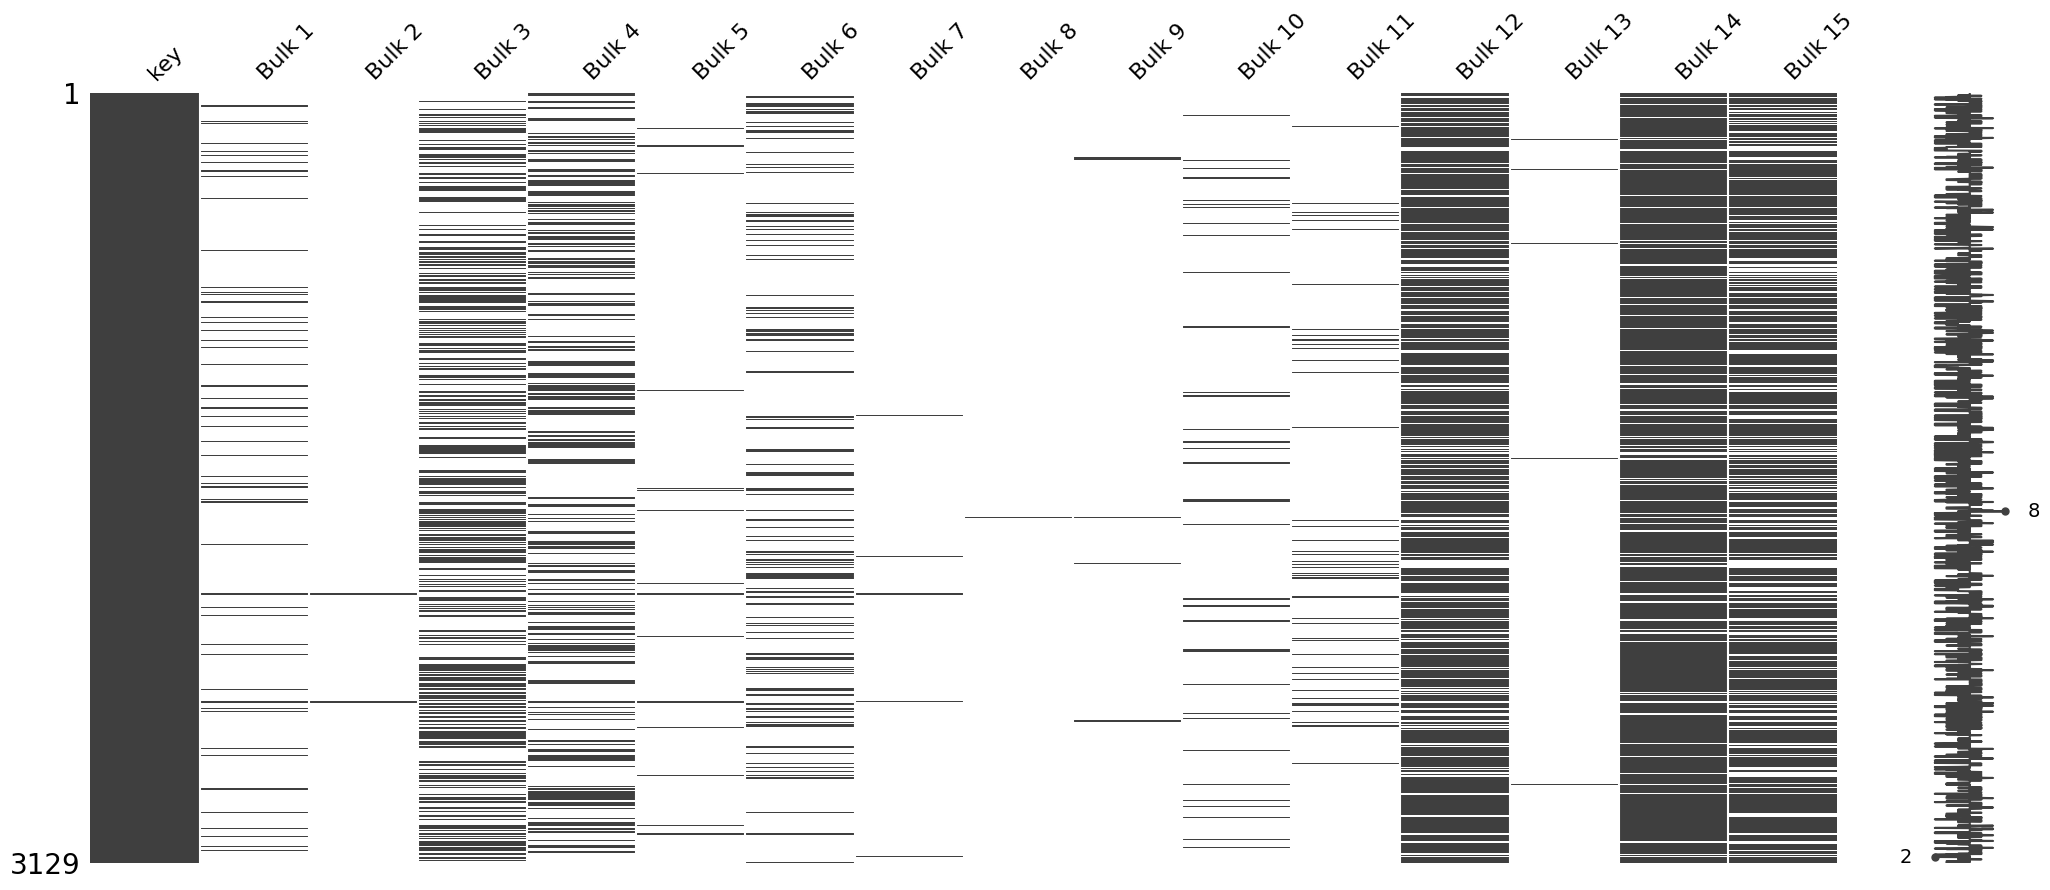

In [605]:
msgn.matrix(df_data_bulk)

In [606]:
df_data_bulk.isna().sum() / df_data_bulk.shape[0] * 100

key         0.000000
Bulk 1     91.946309
Bulk 2     99.296900
Bulk 3     58.517098
Bulk 4     67.593480
Bulk 5     97.539150
Bulk 6     81.591563
Bulk 7     99.201023
Bulk 8     99.968041
Bulk 9     99.392777
Bulk 10    94.375200
Bulk 11    94.343241
Bulk 12    21.700224
Bulk 13    99.424736
Bulk 14    10.322787
Bulk 15    28.155960
dtype: float64

Количество пропусков значительно. У девяти из пятнадцати признаков пропущено более 90% значений. У остальных признаков количество пропусков меньше, но так же значительно. Признаков, в которых доля пропущенных значений составила бы менее 10%, в датасете data_bulk нет.


In [607]:
df_data_bulk.duplicated().sum()

0

In [608]:
df_data_bulk.nunique()

key        3129
Bulk 1       47
Bulk 2       15
Bulk 3      278
Bulk 4      206
Bulk 5       55
Bulk 6      205
Bulk 7       25
Bulk 8        1
Bulk 9       10
Bulk 10      77
Bulk 11     101
Bulk 12     331
Bulk 13      14
Bulk 14     284
Bulk 15     156
dtype: int64

In [609]:
outliers_and_features_distribution(
    df_data_bulk,
    'Bulk 7',
    'Объем подачи сыпучих материалов',
    'salmon')

In [610]:
outliers_and_features_distribution(
    df_data_bulk,
    'Bulk 12',
    'Объем подачи сыпучих материалов',
    'khaki')

Для признака 'Bulk 7' 99.2% значений отсутствуют, что делает этот признак непригодным для использования в машинном обучении. Однако в признаке 'Bulk 12' отсутствует лишь 21.7% значений, что делает его пригодным для использования в качестве фактора для прогнозирования. Выброс в признаке 'Bulk 12' не будет обрабатываться, так как он может быть естественным отображением максимальных значений для данного признака.

Пропуски, наблюдаемые в присадках, свидетельствуют о том, что в указанный момент времени присадки в ковш не добавлялись. Следовательно, все пропуски могут быть заполнены нулевыми значениями.

#### **Анализ данных датасета 'data_bulk_time.csv'**

---

In [611]:
df_data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [612]:
df_data_bulk_time.duplicated().sum()

0

In [613]:
df_data_bulk_time.nunique()

key        3129
Bulk 1      252
Bulk 2       22
Bulk 3     1298
Bulk 4     1014
Bulk 5       77
Bulk 6      576
Bulk 7       25
Bulk 8        1
Bulk 9       19
Bulk 10     176
Bulk 11     177
Bulk 12    2450
Bulk 13      18
Bulk 14    2806
Bulk 15    2248
dtype: int64

Явных дубликатов в датасете data_bulk_time нет.

In [614]:
df_data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Тип данных в датасете не соответствует оптимальному для проведения анализа или машинного обучения. В случае, если данные были бы пригодны для использования в машинном обучении, рекомендуется было бы изменить тип данных на datetime для более удобной работы с временными метками. Однако, скорее всего, признаки в датасете содержат избыточное количество пропущенных значений, что делает их непригодными для использования в машинном обучении. В связи с этим, изменение типа данных не является целесообразным.

In [615]:
df_data_bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [616]:
round(df_data_bulk_time.isna().sum() / df_data_bulk_time.shape[0] * 100, 2)

key         0.00
Bulk 1     91.95
Bulk 2     99.30
Bulk 3     58.52
Bulk 4     67.59
Bulk 5     97.54
Bulk 6     81.59
Bulk 7     99.20
Bulk 8     99.97
Bulk 9     99.39
Bulk 10    94.38
Bulk 11    94.34
Bulk 12    21.70
Bulk 13    99.42
Bulk 14    10.32
Bulk 15    28.16
dtype: float64

Количество пропущенных значений в датасете data_bulk_time значительно и соответствует количеству пропусков в датасете data_bulk. Поскольку временные метки операций в разных датасетах представлены асинхронно, создание синтетического признака машинного обучения на основе данных из датасета data_bulk_time с привязкой к дате/времени нецелесообразно.

Данные из датасета data_bulk_time не могут быть использованы в контексте машинного обучения.

#### **Анализ данных датасета 'data_gas.csv'**

---

In [617]:
df_data_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [618]:
df_data_gas.duplicated().sum()

0

Явных дубликатов в датасете нет.

In [619]:
df_data_gas.nunique()

key      3239
Газ 1    3239
dtype: int64

In [620]:
df_data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


Тип данных корректный, изменений не требует.

In [621]:
df_data_gas.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
Газ 1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


In [622]:
df_data_gas.isna().sum().T

key      0
Газ 1    0
dtype: int64

<Axes: >

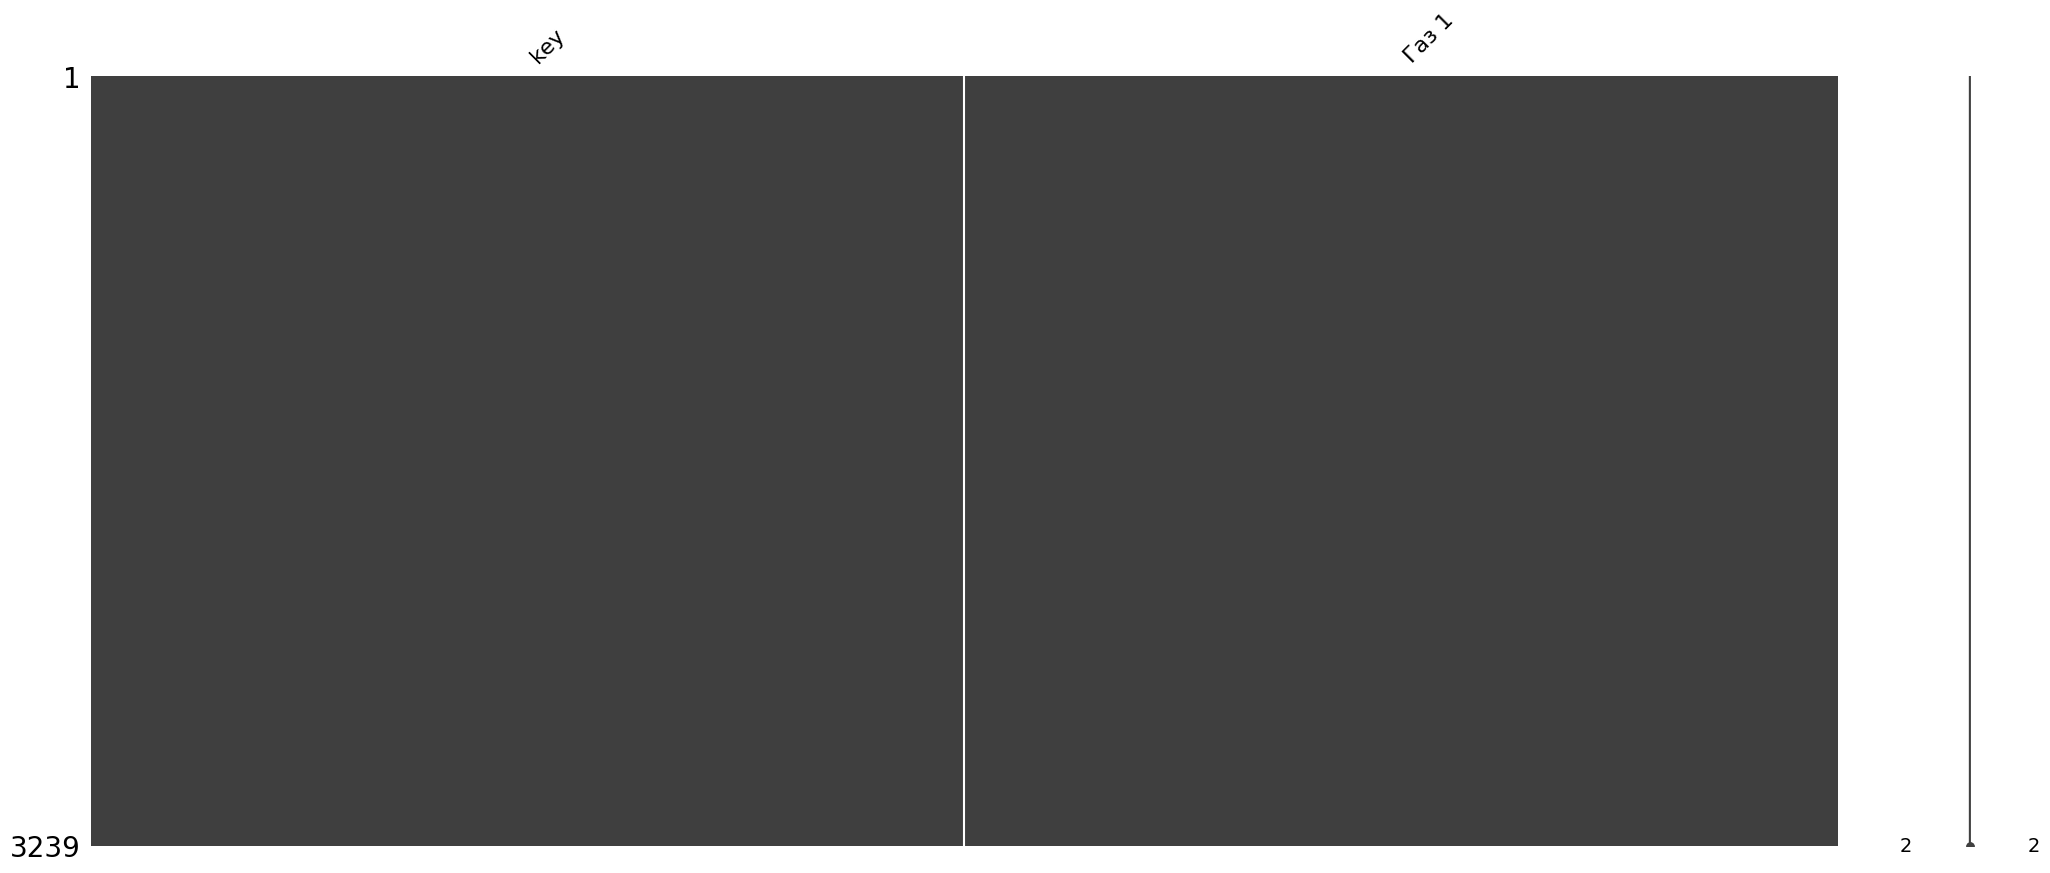

In [623]:
msgn.matrix(df_data_gas)

In [624]:
outliers_and_features_distribution(
    df_data_gas,
    'Газ 1',
    'Продувка сплава газом',
    'orchid')

In [625]:
gas_outliers = round((df_data_gas.loc[df_data_gas['Газ 1'] > 23.9].shape[0] / df_data_gas.shape[0]) * 100, 2)
print(f'Доля выбросов в признаке \'Газ 1\': \n {gas_outliers}%')

Доля выбросов в признаке 'Газ 1': 
 3.89%


In [626]:
df_data_gas.loc[df_data_gas['Газ 1'] > 23.9, 'Газ 1'] = np.nan

In [627]:
df_data_gas.isna().sum()

key        0
Газ 1    126
dtype: int64

In [628]:
na_columns = ['Газ 1']
na_columns

['Газ 1']

In [629]:
imputer_data_gas = KNNImputer(
    n_neighbors = 5,
    copy = False
)

In [630]:
df_data_gas[na_columns] = imputer_data_gas.fit_transform(df_data_gas[na_columns])

In [631]:
df_data_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

In [632]:
gas_outliers = round((df_data_gas.loc[df_data_gas['Газ 1'] > 23.9].shape[0] / df_data_gas.shape[0]) * 100, 2)
print(f'Доля выбросов в признаке \'Газ 1\': \n {gas_outliers}%')

Доля выбросов в признаке 'Газ 1': 
 0.0%


Доля значений, классифицируемых как выбросы, составляет менее одного процента от общего объема данных. Тем не менее, диапазон значений не является чрезмерно широким. Возможно, наблюдаемые значения могут отражать особенности технологического процесса, такие как изменения в объеме продуваемой стали или другие факторы, требующие различного количества добавленного газа для отдельных партий. Рекомендуется дополнительное исследование данного вопроса совместно с инженерами соответствующих подразделений комбината.

#### **Анализ данных датасета 'data_temp.csv'**

---

In [633]:
df_data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [634]:
df_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


Тип данных столбца (признака) 'Время замера' необходимо изменить с 'object' на 'datetime'.

In [635]:
df_data_temp['Время замера'] = pd.to_datetime(df_data_temp['Время замера'])

In [636]:
df_data_temp.dtypes

key                      int64
Время замера    datetime64[ns]
Температура            float64
dtype: object

Выведем информацию о дате/времени самого раннего и позднего замера температуры и о длительности периода между крайними точками замера.

In [637]:
# выведем самую раннюю дату замера темпреатуры
print('Дата самого раннего замера температуры: \n', df_data_temp['Время замера'].min())

Дата самого раннего замера температуры: 
 2019-05-03 11:16:18


In [638]:
# выведем самую позднюю дату замера температуры
print('Дата самого позднего замера температуры: \n', df_data_temp['Время замера'].max())

Дата самого позднего замера температуры: 
 2019-09-01 04:38:08


In [639]:
# проверим, сколько времени прошло между самым ранним и поздним
# замером температуры
print('Промежуток между самым ранним и поздним замером температуры: \n', df_data_temp['Время замера'].max() - df_data_temp['Время замера'].min())

Промежуток между самым ранним и поздним замером температуры: 
 120 days 17:21:50


In [640]:
df_data_temp.duplicated().sum()

0

Явных дубликатов в датасете нет.

In [641]:
df_data_temp.isna().sum()

key                0
Время замера       0
Температура     2901
dtype: int64

In [643]:
round(df_data_temp.isna().sum() / df_data_temp.shape[0] * 100, 2)

key              0.00
Время замера     0.00
Температура     18.24
dtype: float64

18% значений не заполнены.

In [644]:
df_data_temp.nunique()

key              3216
Время замера    15907
Температура       175
dtype: int64

In [645]:
df_data_temp.describe().T

,count,mean,min,25%,50%,75%,max,std
key,15907.0,1607.88087,1.0,790.0,1618.0,2427.0,3241.0,942.212073
Время замера,15907,2019-07-02 09:55:01.000942848,2019-05-03 11:16:18,2019-06-01 16:24:51.500000,2019-06-30 10:31:14,2019-08-03 12:07:59,2019-09-01 04:38:08,NaN
Температура,13006.0,1591.84092,1191.0,1581.0,1591.0,1601.0,1705.0,21.375851


Исчерпывающий анализ статистических данных не выявляет существенных аномалий или отклонений. Однако, для получения более детальной картины, мы планируем проанализировать распределение значений в переменной "Температура".

In [646]:
outliers_and_features_distribution(
    df_data_temp,
    'Температура',
    'Результаты измерения температуры',
    'lightskyblue')

В зависимости от конкретного типа стали и технологических процессов, температура плавления металла может изменяться и достигать значений даже ниже 1200 градусов Цельсия. Согласно классификации, <font color='crimson'> используемой в литературе (Туробов, Ш. Н. и др., 2021)</font>, стали обычно делят на три категории: легкоплавкие, среднеплавкие и тугоплавкие. Легкоплавкие стали имеют температуру плавления в районе 600 градусов Цельсия, среднеплавкие – от 600 до 1600 градусов Цельсия, а тугоплавкие – выше 1600 градусов Цельсия.

Согласно данным, производимая на металлургическом комбинате сталь относится к категории среднеплавких. Температура плавления данного сплава составляет 1450 градусов Цельсия. Следовательно, все значения температуры, ниже указанного порога, не представляют интереса для обучения модели, поскольку при таких низких температурах процесс плавления металла не происходит.

На этапе предварительной обработки данных предлагается удалить все записи с температурой ниже 1450 градусов Цельсия. Однако следует отметить, что информация о температуре является ключевой для достижения поставленных целей. Хотя процент пропущенных значений (18%) достаточно высок, он не является критическим. Заполнение пропущенных данных средними значениями, медианой или фиксированными константами может привести к искажению результатов, поэтому более разумным решением будет удаление пропусков на этапе предобработки данных.

#### **Анализ данных датасета 'data_wire.csv'**

---

In [647]:
df_data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
df_data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Тип данных столбцов (признаков) корректный, менять его не требуется.

In [649]:
df_data_wire.duplicated().sum()

0

Явных дубликатов в датасете нет.

In [650]:
df_data_wire.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.000000,823.000000,1619.000000,2434.000000,3241.000000
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


Исходя из ряда признаков, можно предварительно оценить возможное наличие выбросов в данных. Однако, необходимо отметить, что достоверность таких выводов остается сомнительной в связи с тем, что в представленном датасете лишь один из девяти признаков ('Wire 1') содержит незначительное количество пропущенных значений. Во всех остальных признаках отмечается крайне недостаточное количество заполненных данных, что осложняет адекватную оценку возможных выбросов и требует дополнительного анализа для корректного вывода.

In [651]:
round(df_data_wire.isna().sum() / df_data_wire.shape[0] * 100, 2)

key        0.00
Wire 1     0.84
Wire 2    64.98
Wire 3    97.96
Wire 4    99.55
Wire 5    99.97
Wire 6    97.63
Wire 7    99.64
Wire 8    99.38
Wire 9    99.06
dtype: float64

При наличии значительного объема пропущенных данных в датасете 'data_wire', его использование в чистом виде для задач машинного обучения оказывается невозможным. Такая неполнота информации не обеспечивает достаточной основы для адекватного анализа и обучения моделей.

Однако, из этого датасета можно извлечь ценные данные путем создания синтетического признака. Этот признак может быть сформирован путем заполнения пропусков нулевыми значениями и последующим объединением информации из всех признаков от 'Wire 1' до 'Wire 9' путем их суммирования. Полученные суммы могут быть агрегированы по ковшам (партиям). Если такой синтетический признак успешно пройдет проверку на мультиколлинеарность с другими признаками, его можно включить в обучающий датасет для дальнейшего анализа и построения моделей машинного обучения.

Кроме того, в обучающий датасет также могут быть включены признаки 'Wire 1', где пропусков составляют лишь 1% от общего числа записей, и 'Wire 2', где заполнено около 35% значений. Эти признаки, несмотря на недостаточное количество пропусков, могут оказаться полезными для обучения моделей.

#### **Анализ данных датасета 'data_wire_time.csv'**

---

In [652]:
df_data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [653]:
df_data_wire_time.nunique()

key       3081
Wire 1    3055
Wire 2    1079
Wire 3      63
Wire 4      14
Wire 5       1
Wire 6      73
Wire 7      11
Wire 8      19
Wire 9      29
dtype: int64

In [654]:
round(df_data_wire_time.isna().sum()/df_data_bulk_time.shape[0] * 100, 2) 

key        0.00
Wire 1     0.83
Wire 2    63.98
Wire 3    96.45
Wire 4    98.02
Wire 5    98.43
Wire 6    96.13
Wire 7    98.11
Wire 8    97.86
Wire 9    97.54
dtype: float64

Анализ количества пропущенных значений в датасете 'data_wire_time' показывает аналогичную картину тому, что наблюдалась в датасете 'data_wire'. Это означает, что информация, содержащаяся в признаках 'data_wire_time', также не может быть использована непосредственно для задач машинного обучения из-за недостаточного объема данных.

Следовательно, создание синтетического признака для машинного обучения на основе информации из 'data_wire_time' является нерациональным. Это обусловлено тем, что дата и время в различных датасетах не синхронизированы, что делает невозможным или неправильным использование временных данных для создания синтетического признака в контексте других признаков.

### **Выводы по п. Анализ данных**

---

1. Для анализа доступны данные за период четырех месяцев, с 3 мая 2019 года по 1 сентября 2019 года.

2. В датасете 'data_arc' были выявлены и обработаны два выброса. Данный датасет содержит два информативных признака - "Активная мощность" и "Реактивная мощность", с указанием времени начала и окончания нагрева дугой. Общее количество наблюдений в датасете составляет 14876.

3. В датасетах 'data_bulk' и 'data_bulk_time' информация о объеме подачи сыпучих материалов представлена с высоким количеством пропущенных значений. В 'data_bulk' из 15 признаков только в двух заполнено более 78% данных, остальные признаки имеют значительное количество пропусков. Аналогичная ситуация наблюдается и в 'data_bulk_time'. Общее количество наблюдений в обоих датасетах составляет 3129.

4. В датасете 'data_gas' представлен информативный признак 'Газ 1' о продувке сплава газом. Общее количество наблюдений в этом датасете составляет 3239.

5. В датасете 'data_temp' содержится целевой признак 'Температура', который требует дополнительного изучения с точки зрения удаления пропусков и выбросов. Общее количество наблюдений в этом датасете составляет 15907.

6. В датасетах 'data_wire' и 'data_wire_time' сведения о объеме используемых проволочных материалов также представлены с высоким количеством пропущенных значений. В обоих датасетах наблюдается схожая картина с пропусками. Общее количество наблюдений в обоих датасетах составляет 3081.

7. После анализа данных предполагается, что наибольшую важность для машинного обучения могут иметь признаки из датасетов 'data_arc', 'data_gas' и 'data_temp'.

8. На основе данных датасетов 'data_bulk' и 'data_wire' планируется создать по одному агрегирующему синтетическому признаку. Пропуски в данных будут заполнены нулями, данные будут просуммированы по каждому наблюдению, а затем проведена группировка значений по ковшам (партиям). Если синтетические признаки успешно пройдут проверку на мультиколлинеарность, они будут использованы для машинного обучения.

9. На основе признаков 'Активная мощность' и 'Реактивная мощность' может быть создан синтетический признак 'Полная мощность'. Однако, вероятно, что этот новый признак будет иметь высокую линейную корреляцию с другими признаками. Решение о его использовании будет принято после проверки на мультиколлинеарность.

### **Предобработка данных. Выделение признаков и целевого признака. Объединение таблиц**

---
